In [1]:
# pip install python_speech_features

In [2]:
# pip install librosa

In [3]:
import librosa as librosa
(samples,sample_rate)=librosa.load("Speech2text.wav")

In [4]:
print(len(samples))
print(samples)

202860
[-0.03153212 -0.0453894  -0.03471145 ... -0.00536506 -0.01346441
 -0.00622209]


In [5]:
202860/22050
# audio sound length =9.2 sec

9.2

In [6]:
import os
import wave
with wave.open('Speech2text.wav',"rb")as wave_file:
    frame_rate=wave_file.getframerate()
print(frame_rate)

44100


samples: 202860 sample rate: 22050


Text(0.5, 0, 'Time(sec)')

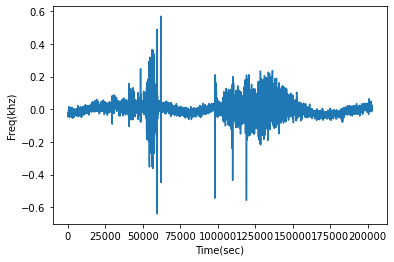

In [7]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
print("samples:",len(samples),"sample rate:",sample_rate)
plt.plot(np.linspace(0,len(samples),sample_rate),samples[0:sample_rate])
plt.ylabel('Freq(khz)')
plt.xlabel('Time(sec)')

In [8]:
import IPython.display as ipd
ipd.Audio(samples,rate=22050)

In [9]:
frequencies,time,spectogram=signal.spectrogram(samples,8000)

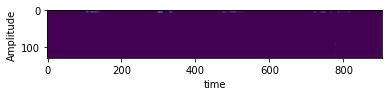

In [10]:
frequencies,time,spectogram=signal.spectrogram(samples,8000)
plt.xlabel("time")
plt.ylabel('Amplitude')
plt.imshow(spectogram)

In [11]:
import os
train_audio_path=('waves')

In [12]:
labels=os.listdir(train_audio_path)
print(labels)

['jump', 'run', 'stop']


In [13]:
for label in labels:
    l=train_audio_path+'/'+label
    print(l)

waves/jump
waves/run
waves/stop


In [14]:
for label in labels:
    waves=[f for f in os.listdir(train_audio_path+'\\'+label)]
    print(waves)

['1.wav', '2.wav', '3.wav', '4.wav', 'rec.wav', 'rec1.wav', 'rec2.wav', 'rec3.wav', 'rec4.wav', 'rec5.wav', 'rec6.wav', 'rec7.wav', 'rec8.wav']
['1.wav', '2.wav', 'rec.wav', 'rec1.wav', 'rec2.wav', 'rec3.wav', 'rec4.wav', 'rec5.wav', 'run1.wav', 'run2.wav']
['1.wav', '2.wav', 'rec.wav', 'rec1.wav', 'rec2.wav', 'rec3.wav', 'rec4.wav', 'rec5.wav', 'stop.wav', 'stop1.wav']


In [15]:
features=[]
ex_labels=[]
import numpy as np
import librosa as librosa
for label in labels:
    waves=[f for f in os.listdir(train_audio_path+'/'+label)]
    for wav in waves:
        samples,sample_rate=librosa.load(train_audio_path+'/'+label+'/'+wav, sr=16000)
        samples=librosa.resample(samples,sample_rate,8000)
        mfccs=np.mean(librosa.feature.mfcc(y=samples,sr=sample_rate,n_mfcc=40).T,axis=0)
        features.append(mfccs)
        ex_labels.append(label)
print(len(features))
print(len(features[0]))
print("final features", features)

<ipython-input-15-d252585cdd85>:9: FutureWarning: Pass orig_sr=16000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples=librosa.resample(samples,sample_rate,8000)


33
40
final features [array([-480.26944  ,   84.2795   ,  -41.400913 ,  -21.400623 ,
        -32.842777 ,  -24.749033 ,  -34.016544 ,  -25.301067 ,
        -23.640371 ,  -17.063272 ,  -14.141522 ,   -2.5055695,
         -9.622426 ,   -7.9941564,   -9.81933  ,   -0.8199568,
         -9.9754715,   -6.9593496,   -9.56199  ,   -1.3854414,
         -1.9836296,    4.9932413,    1.268742 ,    4.699382 ,
          1.5645597,    3.6191652,    5.097348 ,    6.585176 ,
          1.0477712,    1.0456846,    5.450222 ,    3.7644362,
          5.28124  ,    0.8779559,   -1.6733547,   -1.2063497,
         -1.7118188,   -1.907617 ,   -2.899916 ,   -0.5965485],
      dtype=float32), array([-5.3433844e+02,  5.6903656e+01, -2.2221605e+01, -2.7184904e+01,
       -2.8808411e+01, -1.5405676e+01, -2.4913765e+01, -1.9454370e+01,
       -2.1749195e+01, -1.1125440e+01, -1.3877171e+01, -5.7114382e+00,
       -2.4235525e+00, -3.0111666e+00, -6.9442925e+00,  3.4073475e-01,
       -5.6884117e+00,  2.9984746e+00,  2

In [16]:
print(len(ex_labels))
print(ex_labels)

33
['jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'jump', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'run', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop']


In [17]:
X=np.array(features)
Y=np.array(ex_labels)
print(X.shape)
print(Y.shape)

(33, 40)
(33,)


In [18]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
# print(Y)

In [19]:
classes=list(lb.classes_)
print(classes)

['jump', 'run', 'stop']


In [20]:
from sklearn.model_selection import train_test_split
train_wav,test_wav,train_label,test_label=train_test_split(X,Y,test_size=0.2,random_state=777,shuffle=True)
print(train_wav.shape)
print(train_label.shape)

(26, 40)
(26, 3)


In [21]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dropout,Flatten,Dense
from keras.optimizers import Adam
from sklearn import metrics
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [22]:
model=Sequential()
model.add(Conv1D(500,1,activation='relu',input_shape=(40,1)))
model.add(Conv1D(500,1,activation='relu'))
model.add(MaxPooling1D(pool_size=(1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 500)           1000      
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 500)           250500    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 40, 500)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 500)           0         
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 500)               10000500  
                                                        

In [24]:
train_wav=train_wav.reshape(-1,40,1)
test_wav=test_wav.reshape(-1,40,1)
print(train_wav.shape)
print(test_wav.shape)

(26, 40, 1)
(7, 40, 1)


In [25]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
mc=ModelCheckpoint('./best_model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [26]:
history=model.fit(train_wav,train_label,validation_data=(test_wav,test_label),batch_size=5,epochs=50,
                 callbacks=[es,mc],verbose=1)

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 11.2384 - accuracy: 0.3846
Epoch 1: val_accuracy improved from -inf to 0.14286, saving model to .\best_model.hdf5
6/6 [==============================] - 2s 241ms/step - loss: 11.2384 - accuracy: 0.3846 - val_loss: 17.8218 - val_accuracy: 0.1429
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 11.9255 - accuracy: 0.3077
Epoch 2: val_accuracy improved from 0.14286 to 0.71429, saving model to .\best_model.hdf5
6/6 [==============================] - 1s 209ms/step - loss: 11.9255 - accuracy: 0.3077 - val_loss: 3.7717 - val_accuracy: 0.7143
Epoch 3/50
6/6 [==============================] - ETA: 0s - loss: 5.2228 - accuracy: 0.3462
Epoch 3: val_accuracy did not improve from 0.71429
6/6 [==============================] - 1s 139ms/step - loss: 5.2228 - accuracy: 0.3462 - val_loss: 2.4482 - val_accuracy: 0.2857
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 4.6547 - accuracy: 0.4231
Epoch 4: val

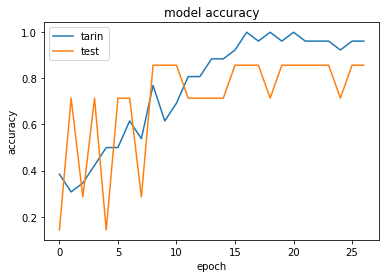

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['tarin','test'],loc='upper left')
plt.show()

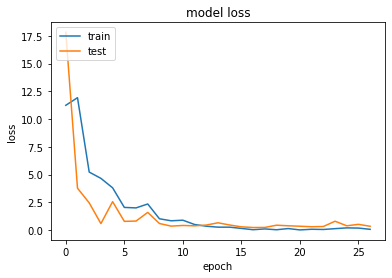

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [29]:
from keras.models import load_model
mod=load_model('best_model.hdf5')
def predict(audio):
    prob=mod.predict(audio.reshape(-1,40,1))
    print(prob)
    index=np.argmax(prob[0])
    return classes[index]
print(predict(train_wav[2]))

1/1 [==============================] - 0s 114ms/step
[[0.07325575 0.9245431  0.00220105]]
run


In [30]:
print(train_label[2])
print(classes)

[0. 1. 0.]
['jump', 'run', 'stop']


In [31]:
# pip install pyttsx3

In [32]:
import pyttsx3
engine=pyttsx3.init()
engine.say(" welcome to expertzlab")
engine.runAndWait()